In [1]:
import pandas as pd

In [18]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [31]:
x_train.drop(columns='Unnamed: 0', inplace=True)

In [33]:
y_train.drop(columns='Unnamed: 0', inplace=True)

In [34]:
y_train

,Haryana Load (MW)
0,3880.22
1,3778.15
2,3742.81
3,3627.39
4,3616.50
...,...
98174,6730.30
98175,6720.85
98176,6738.86
98177,6756.65


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
regr = RandomForestRegressor()

In [37]:
regr.fit(x_train, y_train)

C:\Users\HP\AppData\Local\Temp/ipykernel_5544/1990009532.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train, y_train)


RandomForestRegressor()

In [38]:
x_test

,temp,dew,humidity,windspeed,winddir,cloudcover,visibility,month,Season,Hour of day,minute_interval,Day,Day of Week,Is Weekend Clean
0,32.0,10.0,25.82,14.8,300.0,0.0,4.0,10,3,16,45,19,0,0
1,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,0,19,0,0
2,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,15,19,0,0
3,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,30,19,0,0
4,30.9,13.2,33.88,7.4,303.0,0.0,3.1,10,3,17,45,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42072,10.0,8.0,87.38,0.0,0.0,27.4,2.0,12,0,22,45,31,4,0
42073,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,0,31,4,0
42074,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,15,31,4,0
42075,9.2,7.3,88.04,0.0,0.0,28.5,1.3,12,0,23,30,31,4,0


In [41]:
predictions = regr.predict(x_test)

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [45]:
rmse = np.sqrt(mean_squared_error(y_test['Haryana Load (MW)'], predictions))

In [46]:
rmse

941.6374606789584

In [49]:
mx = y_test['Haryana Load (MW)'].max()
mn = y_test['Haryana Load (MW)'].min()
nrmse = rmse/(mx - mn)

In [50]:
nrmse

0.09045708605271378

In [53]:
import sklearn

r2s = sklearn.metrics.r2_score(y_test['Haryana Load (MW)'], predictions)
r2s

0.6856089639720184

In [54]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [55]:
MAPE(y_test['Haryana Load (MW)'], predictions)

11.907867188697569

In [56]:
test_dates = pd.read_csv('test_dates.csv')

In [57]:
test_dates

,Unnamed: 0,index,Date
0,0,168354,2020-10-19 16:45:00
1,1,168355,2020-10-19 17:00:00
2,2,168356,2020-10-19 17:15:00
3,3,168357,2020-10-19 17:30:00
4,4,168358,2020-10-19 17:45:00
...,...,...,...
42072,42072,210426,2021-12-31 22:45:00
42073,42073,210427,2021-12-31 23:00:00
42074,42074,210428,2021-12-31 23:15:00
42075,42075,210429,2021-12-31 23:30:00


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
y_test_with_dates = y_test
predictions_with_dates = pd.DataFrame(predictions)

In [67]:
y_test_with_dates['Date'] = test_dates['Date']

In [68]:
predictions_with_dates['Date'] = test_dates['Date']

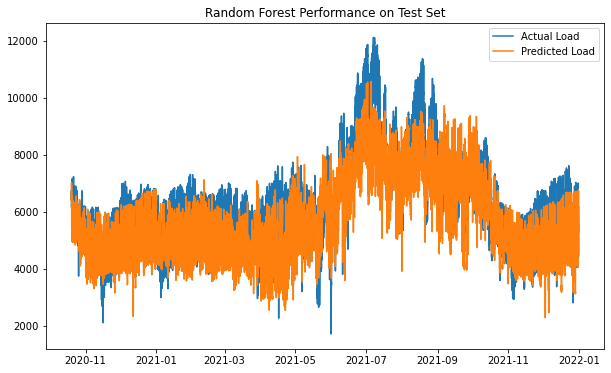

In [71]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(pd.to_datetime(y_test_with_dates['Date']), y_test['Haryana Load (MW)'])
plt.plot(pd.to_datetime(predictions_with_dates['Date']), predictions)
plt.legend(['Actual Load', 'Predicted Load'])
plt.title('Random Forest Performance on Test Set')
plt.show()